In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

%load_ext autoreload
%autoreload 2

# 1. Experimenting with Gaussian Copulas

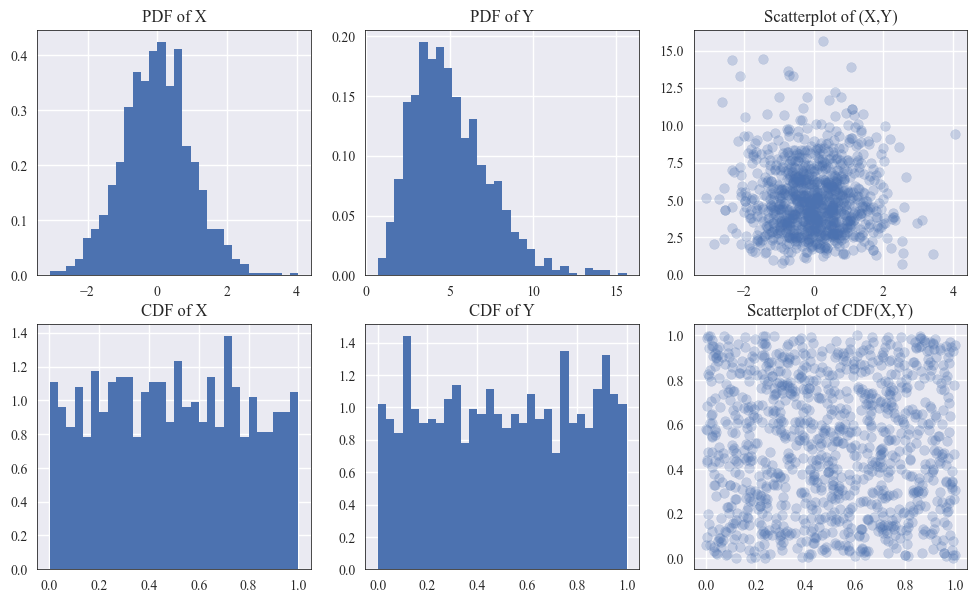

In [6]:
normal = stats.norm()
gamma = stats.gamma(a=5)

X = normal.rvs(1000)
Y = gamma.rvs(1000)

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))

ax[0][0].hist(X, density = True, bins = 30)
ax[0][0].set(title = 'PDF of X')

ax[0][1].hist(Y, density = True, bins = 30)
ax[0][1].set(title = 'PDF of Y')

ax[0][2].scatter(X, Y, alpha = 0.25)
ax[0][2].set(title = 'Scatterplot of (X,Y)')

ax[1][0].hist(normal.cdf(X), density = True, bins = 30)
ax[1][0].set(title = 'CDF of X')

ax[1][1].hist(gamma.cdf(Y), density = True, bins = 30)
ax[1][1].set(title = 'CDF of Y')

ax[1][2].scatter(normal.cdf(X), gamma.cdf(Y), alpha = 0.25)
ax[1][2].set(title = 'Scatterplot of CDF(X,Y)');

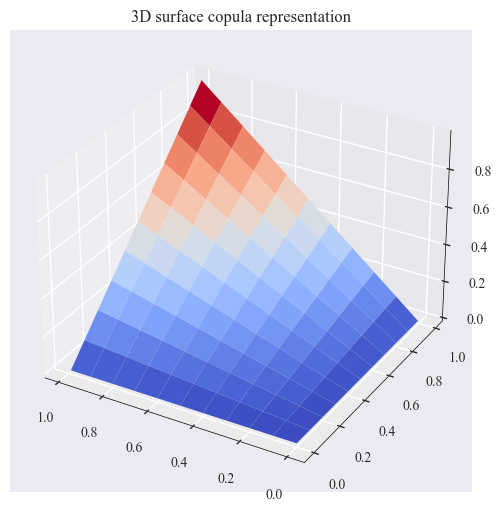

In [7]:
import numpy as np

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111, projection='3d')

x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
x,y = np.meshgrid(x,y)

# apply inverse CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(normal.ppf(x).flatten(),gamma.ppf(y).flatten())])
# calculate the product of two CDFs for each point on a grid
z = normal.cdf(pairs[:,0]).reshape([100,100]) * gamma.cdf(pairs[:,1]).reshape([100,100])

ax0.plot_surface(x, y, z, cmap='coolwarm', rstride=10, cstride=10, linewidth=1)
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation');

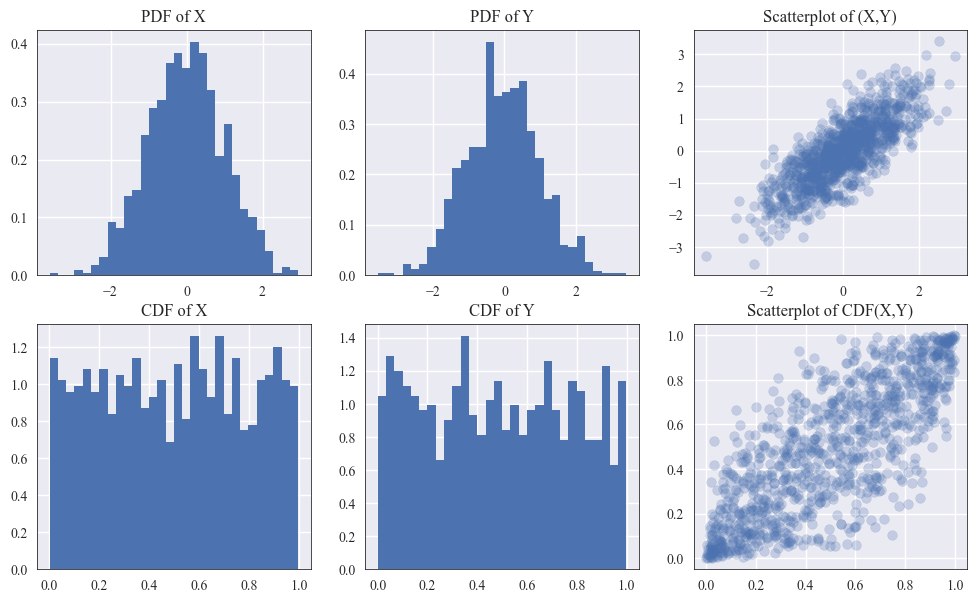

In [8]:
mu = np.array([0, 0])
rho = 0.8
cov = np.array([[1, rho], [rho, 1]])
multivariate_normal = stats.multivariate_normal(mean=mu, cov=cov)

multivariate_sample = multivariate_normal.rvs(size=1000)
X = multivariate_sample[:, 0]
Y = multivariate_sample[:, 1]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 7))

ax[0][0].hist(X, density = True, bins = 30)
ax[0][0].set(title = 'PDF of X')

ax[0][1].hist(Y, density = True, bins = 30)
ax[0][1].set(title = 'PDF of Y')

ax[0][2].scatter(X, Y, alpha = 0.25)
ax[0][2].set(title = 'Scatterplot of (X,Y)')

ax[1][0].hist(normal.cdf(X), density = True, bins = 30)
ax[1][0].set(title = 'CDF of X')

ax[1][1].hist(normal.cdf(Y), density = True, bins = 30)
ax[1][1].set(title = 'CDF of Y')

ax[1][2].scatter(normal.cdf(X), normal.cdf(Y), alpha = 0.25)
ax[1][2].set(title = 'Scatterplot of CDF(X,Y)');

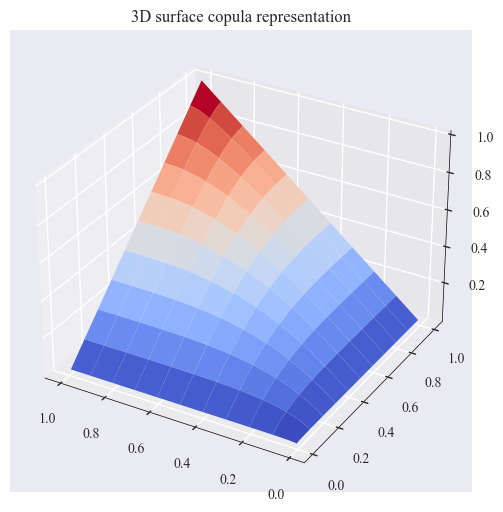

In [9]:
# create a grid
x = np.arange(0.01,1.01,0.01)
y = np.arange(0.01,1.01,0.01)
x,y = np.meshgrid(x,y)

# apply inverse standard normal CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(stats.norm.ppf(x).flatten(),stats.norm.ppf(y).flatten())])
# calculate the value of bivariate normal CDF for each point on a grid
z = multivariate_normal.cdf(pairs).reshape([100,100])

fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')

ax0.plot_surface(x, y, z, cmap='coolwarm', rstride=10, cstride=10, linewidth=1)
ax0.invert_xaxis()
ax0.set(title='3D surface copula representation');

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

%load_ext autoreload
%autoreload 2

In [71]:
from copulapairtrading.copula import ClaytonCopula

copula = ClaytonCopula()

data = pd.read_csv('../data/price_data.csv', index_col = 0)

In [72]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]

pdf = copula.pdf(alpha = 1, vector = data)

<Axes: >

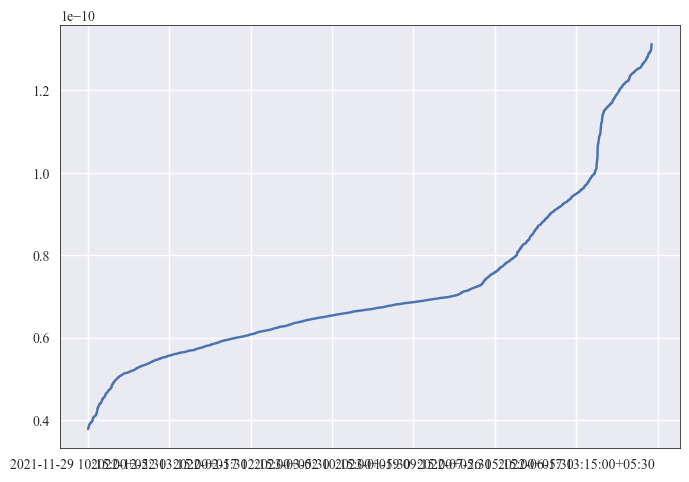

In [75]:
mask = [False] * 30
mask[1] = True
copula.marginal_cdf(mask = mask, vector=data, alpha=1).sort_values().plot()

In [77]:
alpha = copula.fit(vector = data)


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )


In [78]:
alpha

4294967231.056136

In [68]:
copula.convert_to_ecdf(vector = data)

29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29


,ADANIENT.NS,APOLLOHOSP.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,HDFCLIFE.NS,...,NTPC.NS,ONGC.NS,RELIANCE.NS,TATACONSUM.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
2021-04-22 09:15:00+05:30,0.000289,0.064935,0.272150,0.301876,0.000289,0.047619,0.562193,0.517460,0.001732,0.776912,...,0.000289,0.010967,0.000289,0.045887,0.049928,0.112554,0.053102,0.026263,0.123232,0.487157
2021-04-22 10:15:00+05:30,0.000577,0.066089,0.326118,0.301587,0.000577,0.033189,0.574315,0.487446,0.000289,0.783550,...,0.000577,0.002886,0.000577,0.047908,0.053968,0.124387,0.030880,0.022511,0.124675,0.498701
2021-04-22 11:15:00+05:30,0.001154,0.063781,0.320058,0.302165,0.001154,0.030303,0.592785,0.459163,0.000577,0.799711,...,0.001443,0.005195,0.001443,0.050794,0.050505,0.124964,0.026840,0.024242,0.107359,0.496104
2021-04-22 12:15:00+05:30,0.002309,0.062626,0.337951,0.302453,0.000866,0.043290,0.591342,0.462338,0.000866,0.784416,...,0.001732,0.006638,0.002309,0.047330,0.055700,0.119769,0.021645,0.022222,0.128427,0.491775
2021-04-22 13:15:00+05:30,0.003463,0.063203,0.367388,0.302742,0.002309,0.055700,0.578644,0.455988,0.002020,0.794805,...,0.002020,0.002886,0.003175,0.046753,0.051659,0.124098,0.022799,0.021934,0.107359,0.488023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 11:15:00+05:30,0.507071,0.496392,0.999711,0.043001,0.194228,0.774892,0.819913,0.229437,0.876190,0.129582,...,0.833189,0.794805,0.289755,0.088312,0.223088,0.122944,0.072727,0.805195,0.728716,0.022799
2023-04-21 12:15:00+05:30,0.494949,0.484848,0.997691,0.037807,0.173160,0.750938,0.834343,0.226840,0.880231,0.109957,...,0.834343,0.797980,0.285714,0.089466,0.217316,0.113709,0.068975,0.784704,0.719481,0.020491
2023-04-21 13:15:00+05:30,0.503030,0.493506,0.997980,0.041558,0.214141,0.746320,0.849351,0.210967,0.897258,0.087157,...,0.837807,0.795960,0.300722,0.104185,0.227128,0.157576,0.070996,0.780087,0.726118,0.024531
2023-04-21 14:15:00+05:30,0.499278,0.489466,0.998846,0.045310,0.226840,0.750938,0.872150,0.239827,0.901299,0.086580,...,0.858586,0.805772,0.294084,0.103896,0.242713,0.181818,0.074459,0.789033,0.736219,0.030014
